In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import joblib

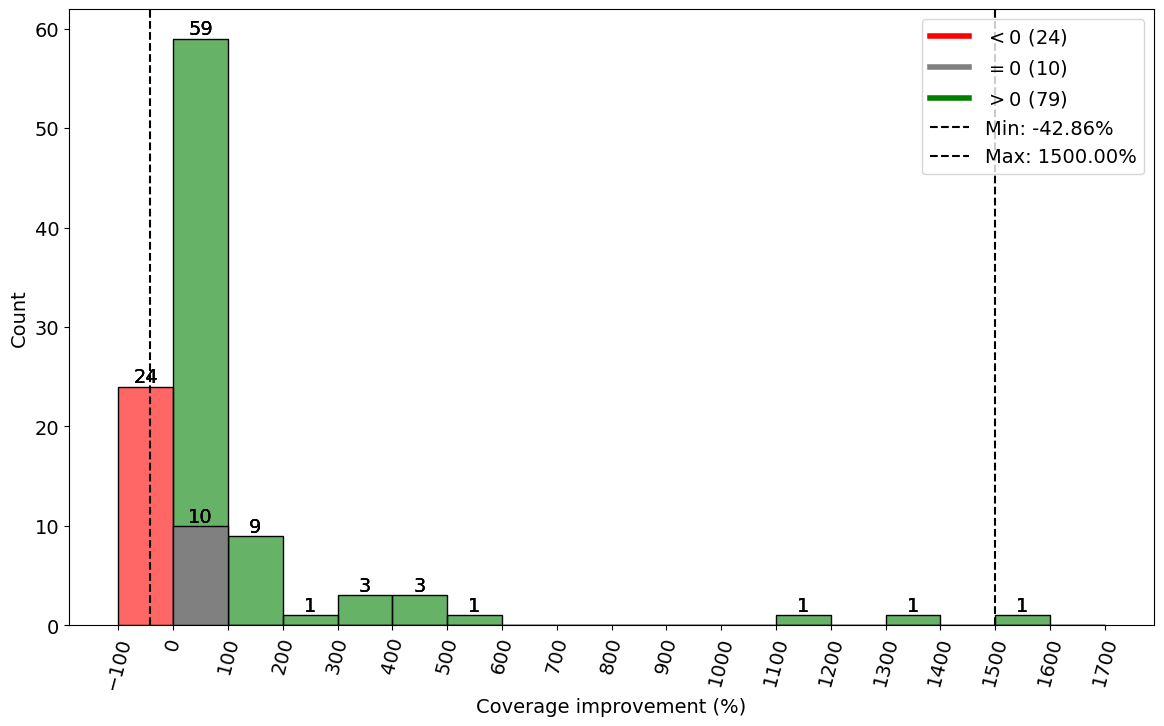

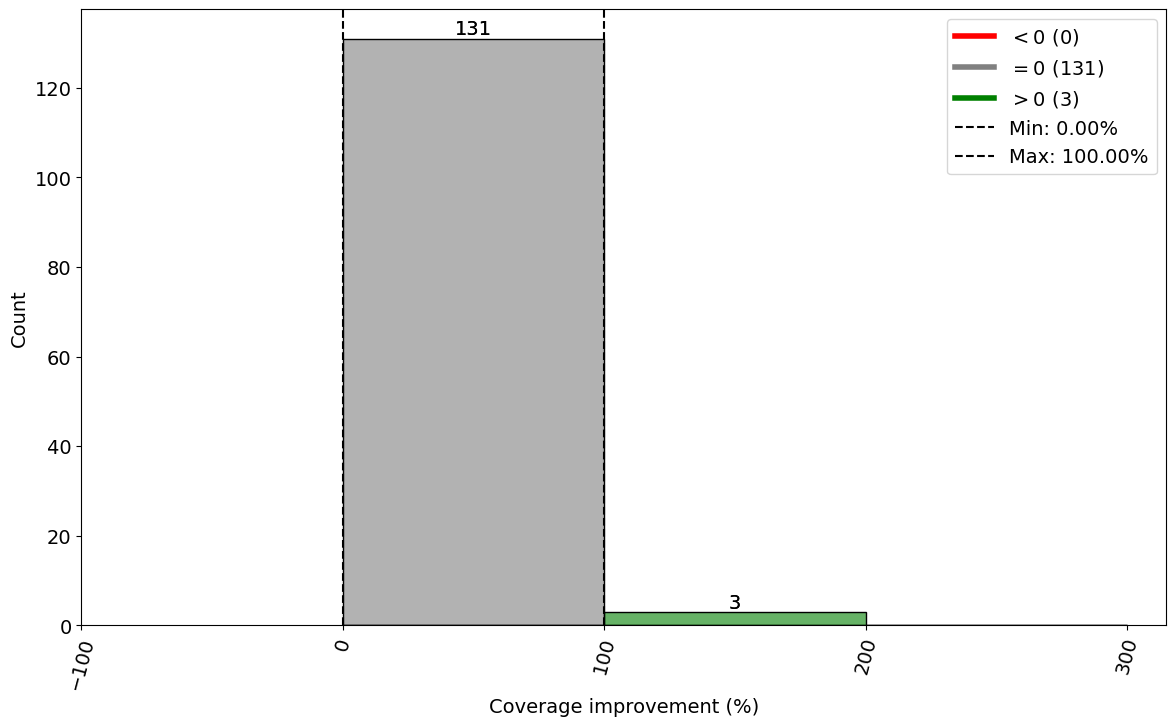

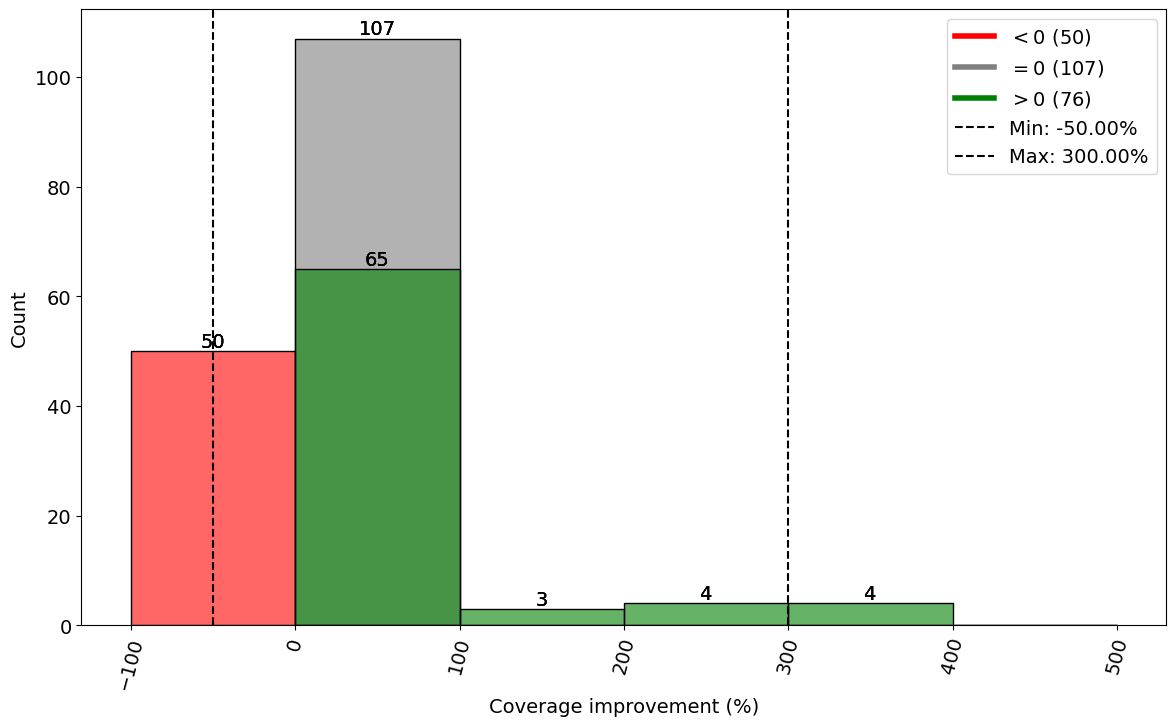

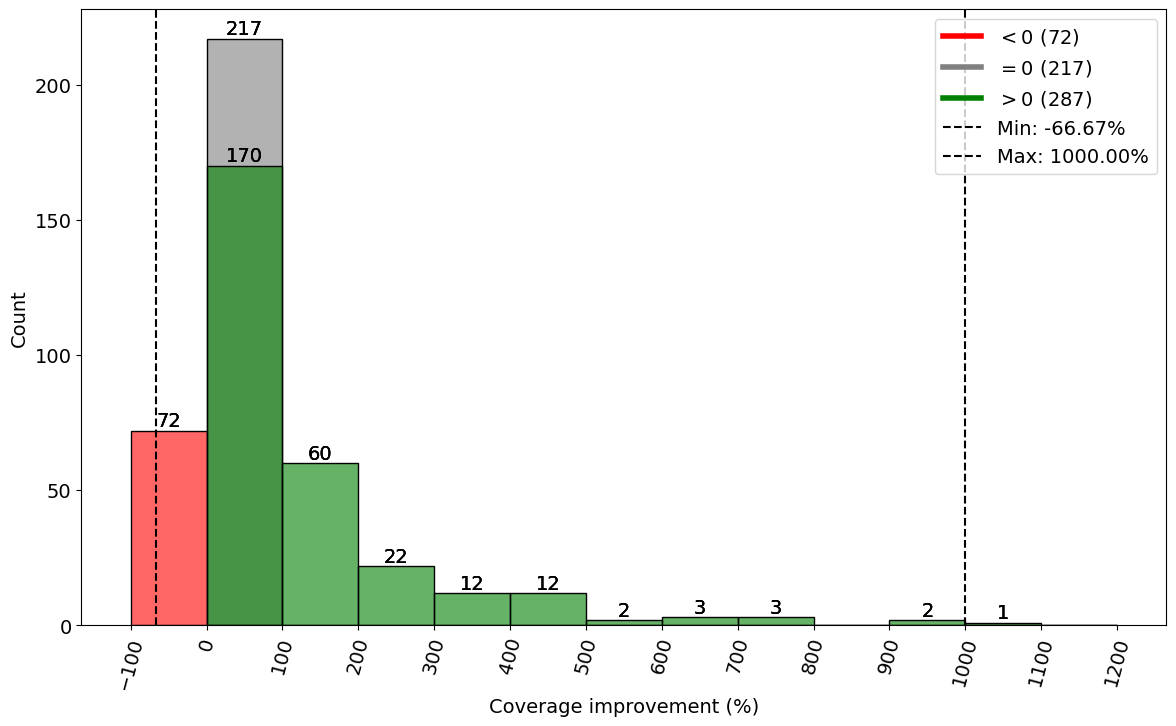

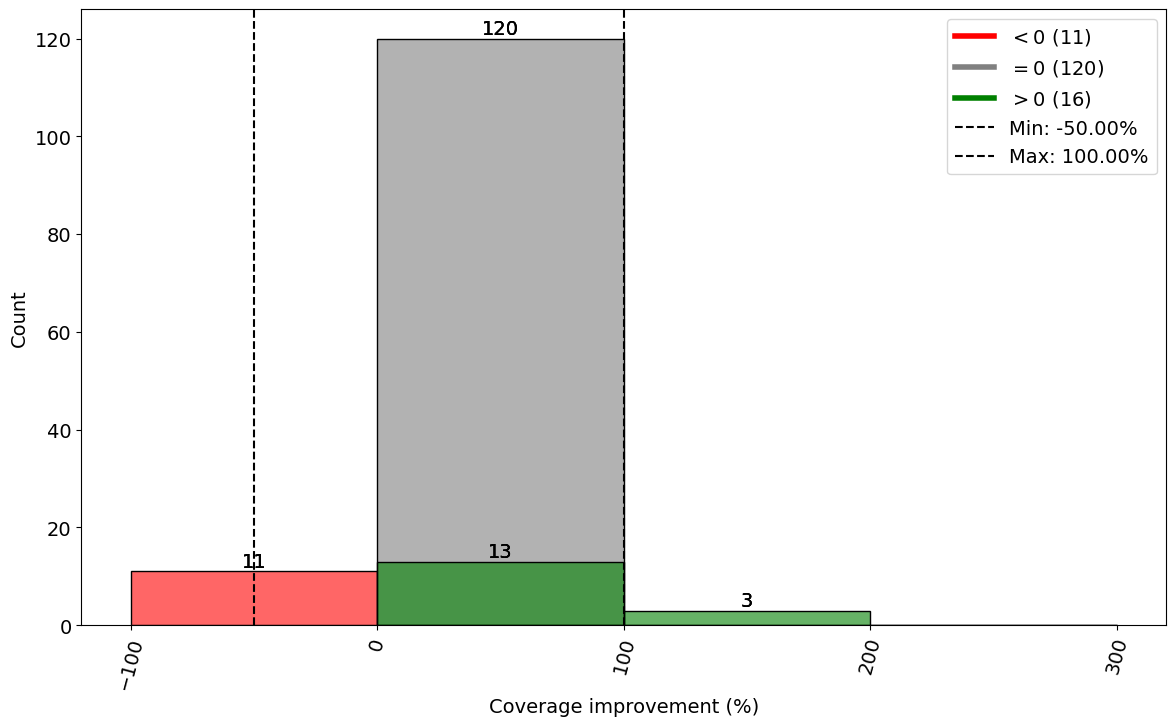

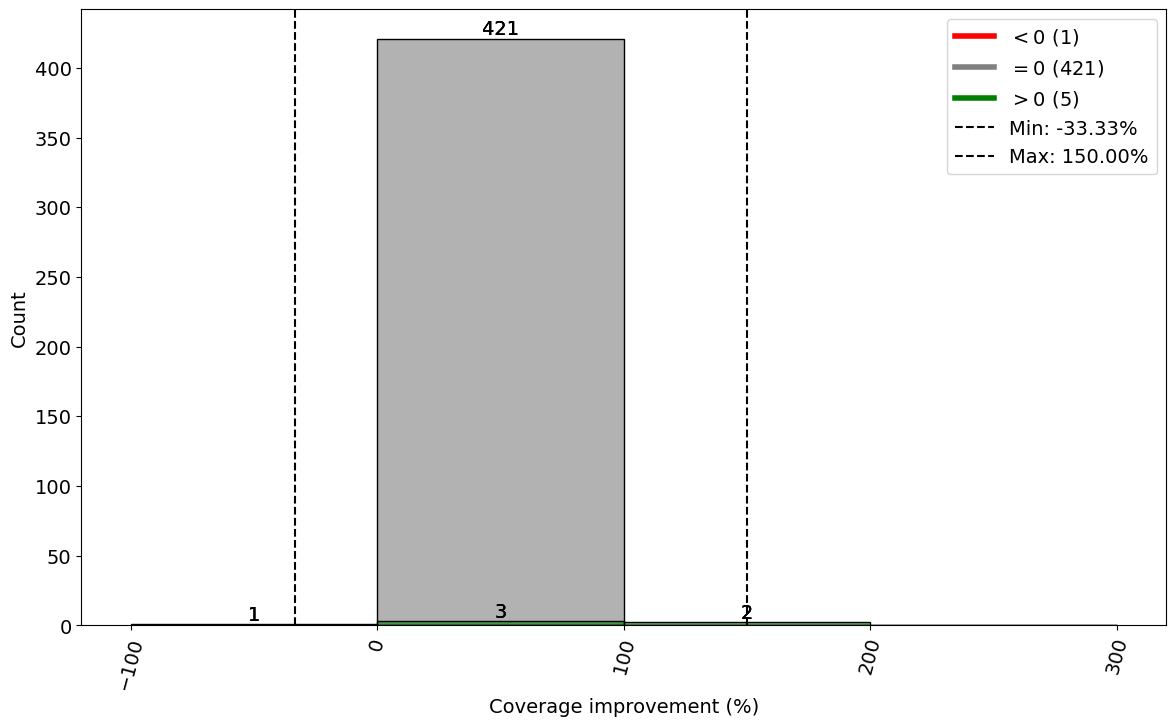

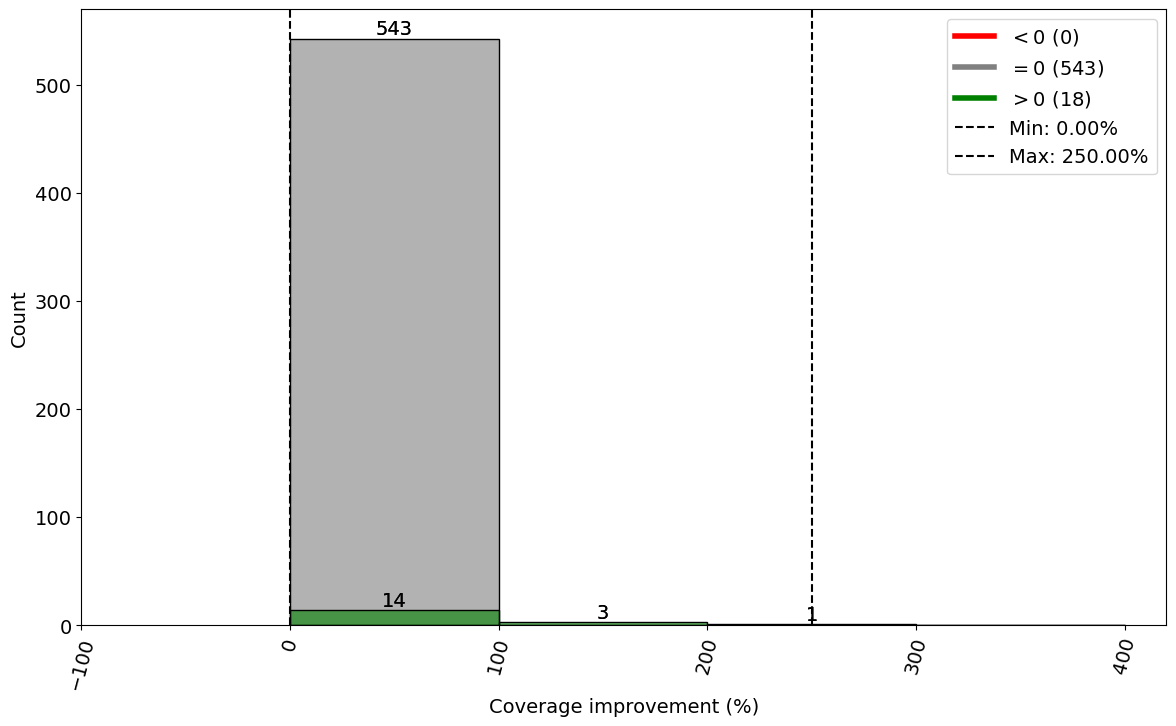

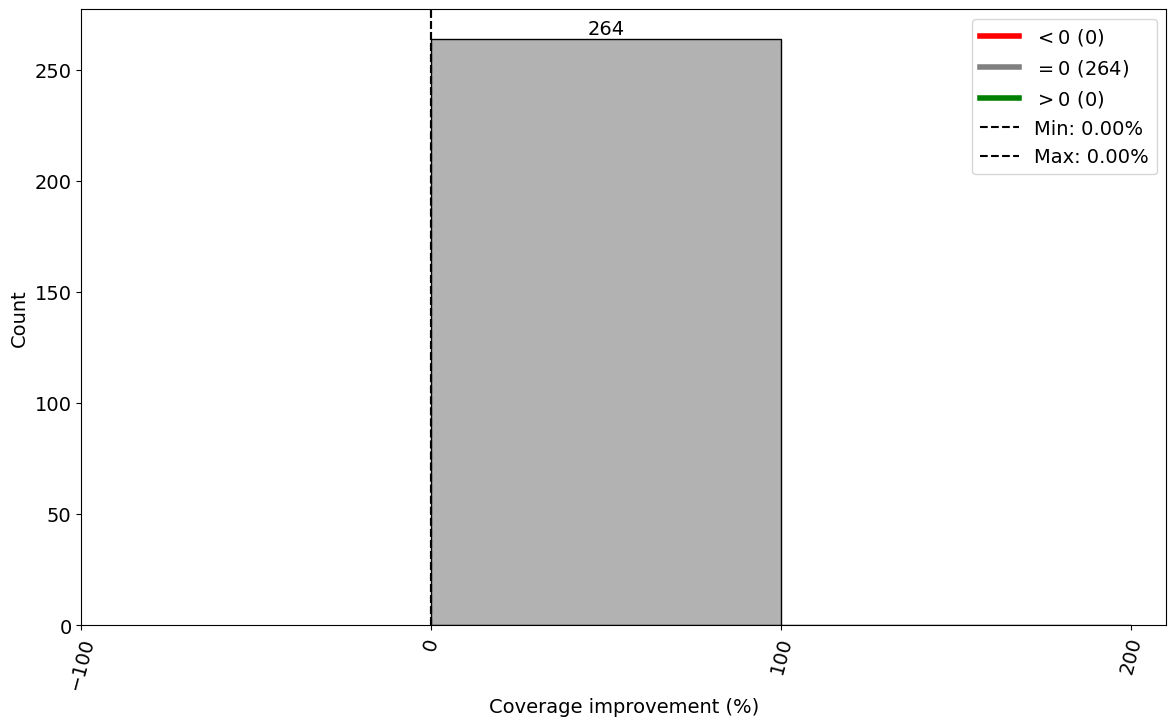

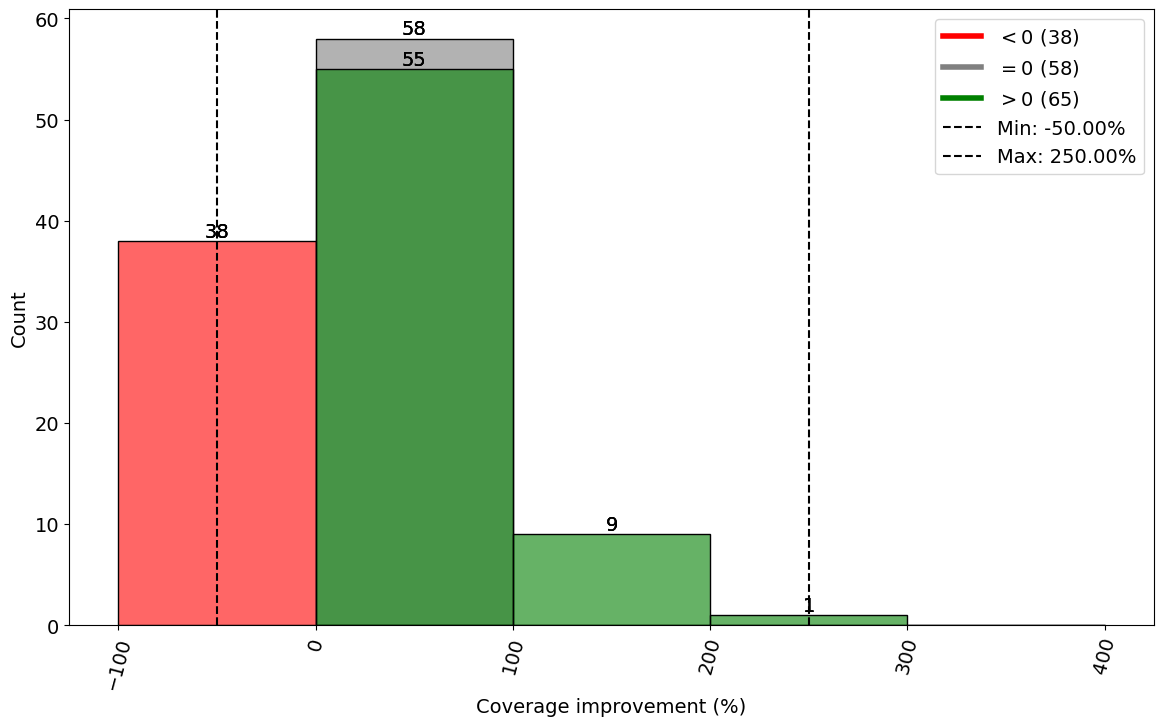

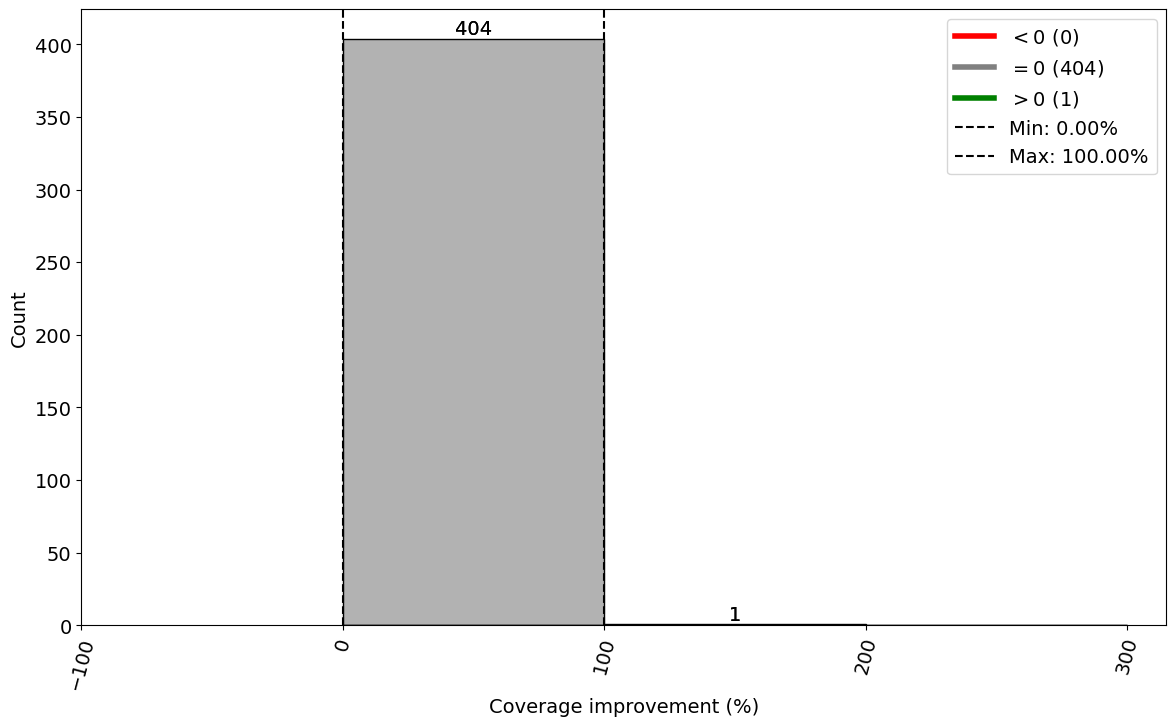

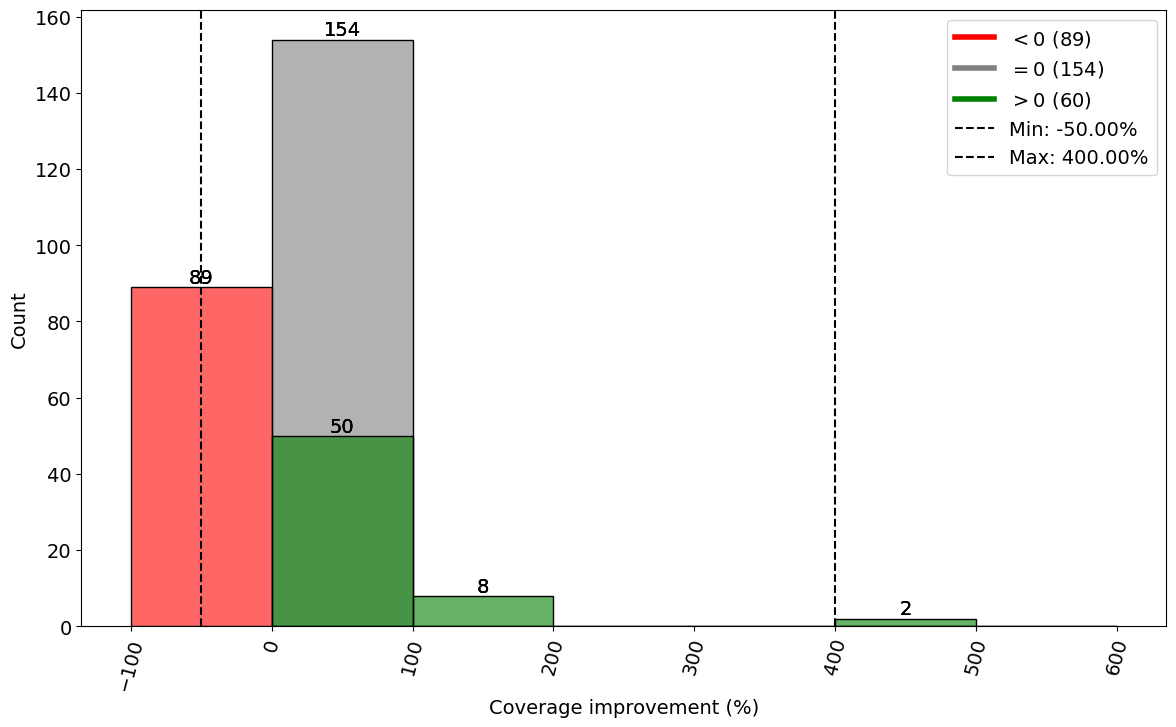

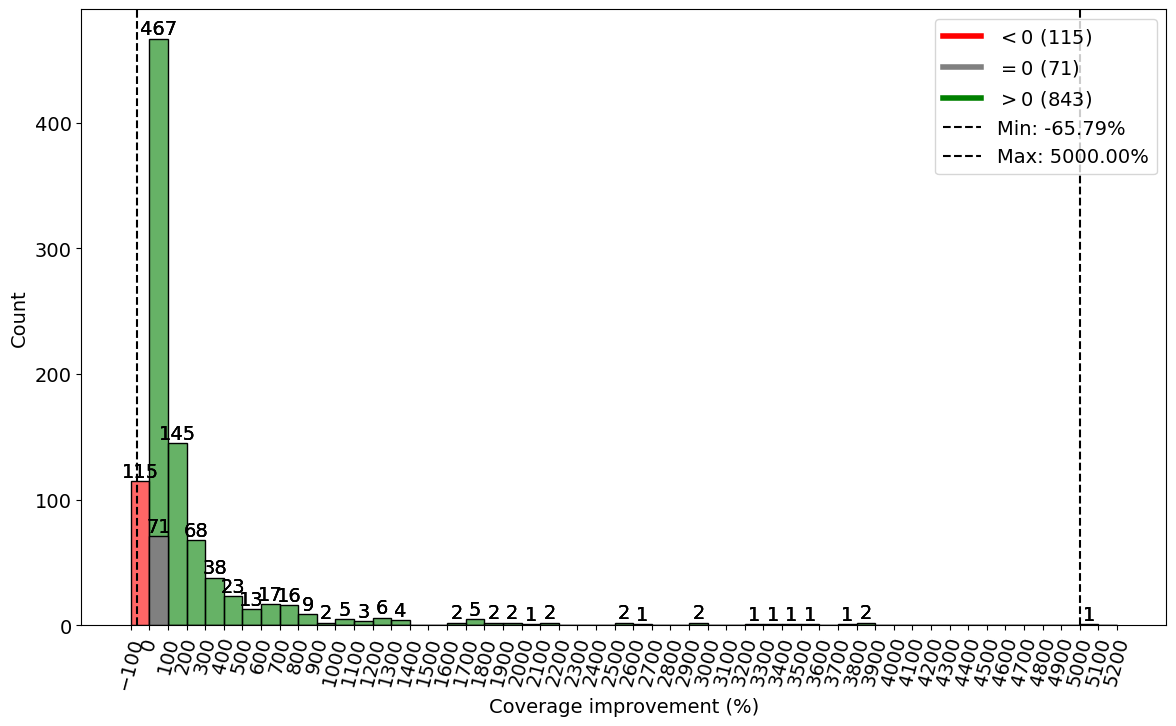

In [3]:
p = 0.25
for dataset_name in ['Iris', 'Wine', 'Vertebral-Column', 'Pima', 'Parkinsons', 'Breast_Cancer', 'Blood_Transfusion', 'Ionosphere', 'Glass', 'Climate', 'Modeling', 'Banknote']:
    raw_df = pd.read_csv(f'{dataset_name}_results/raw_metric_data_0.25.csv')
    
    # Compute relative proportion
    relative_proportion = np.where(
        raw_df['coverage_onestep'] != 0,
        ((raw_df['coverage_twostep'] - raw_df['coverage_onestep']) / raw_df['coverage_onestep']) * 100,
        np.nan
    )
    
    # Separate values
    values_lt_0 = relative_proportion[relative_proportion < 0]
    values_eq_0 = relative_proportion[relative_proportion == 0]
    values_gt_0 = relative_proportion[relative_proportion > 0]
    
    # Define bin width and edges
    bin_width = 100
    min_value = -bin_width if np.nanmin(relative_proportion) >= -bin_width else np.ceil(np.nanmin(relative_proportion) / -bin_width) * -bin_width
    max_value = np.nanmax(relative_proportion) + bin_width
    
    bin_edges_lt_0 = np.arange(min_value, bin_width+1, bin_width)  # Bins for < 0 values
    bin_edges_gt_0 = np.arange(0, max_value+1+bin_width, bin_width)  # Bins for > 0 values
    
    # Create figure
    plt.figure(figsize=(14, 8))
    
    # Plot histograms separately
    ax_list = []
    if len(values_lt_0) > 0:
        ax_lt_0 = sns.histplot(values_lt_0, bins=bin_edges_lt_0, kde=False, color='red', alpha=0.6, label=r'$ < 0$')
        ax_list.append(ax_lt_0)
    if len(values_eq_0) > len(values_gt_0[values_gt_0<bin_width]):    
        ax_eq_0 = sns.histplot(values_eq_0, bins=bin_edges_gt_0, kde=False, color='gray', alpha=0.6, label=r'$ = 0$')
        ax_list.append(ax_eq_0)

    if len(values_gt_0) > 0:
        ax_gt_0 = sns.histplot(values_gt_0, bins=bin_edges_gt_0, kde=False, color='green', alpha=0.6, label=r'$ > 0$')
        ax_list.append(ax_gt_0)
    
    
    if len(values_eq_0) <= len(values_gt_0[values_gt_0<bin_width]):
        ax_eq_0 = sns.histplot(values_eq_0, bins=bin_edges_gt_0, kde=False, color='gray', alpha=1, label=r'$ = 0$')
        ax_list.append(ax_eq_0)
    
    # Add numbers above each bin
    for ax in ax_list:
        for patch in ax.patches:
            height = patch.get_height()
            if height > 0:
                plt.text(
                    patch.get_x() + patch.get_width() / 2,  # Centered in bin
                    height,  # Position above the bar
                    f'{int(height)}',  # Rounded count
                    ha='center', va='bottom', fontsize=14
                )
    
    
    
    # Adjust xticks
    xticks = np.arange(min_value, max_value+1+bin_width, bin_width)
    plt.xticks(xticks, rotation=75,fontsize=14)
    plt.yticks(fontsize=14)
    
    # Find the y-position of the highest bar
    max_height = max([patch.get_height() for patch in plt.gca().patches])
    
    ax = plt.gca()  # Get current axis
    ax.axvline(relative_proportion.min(), color='black', linestyle='--', label=f'Min: {relative_proportion.min():.2f}')
    ax.axvline(relative_proportion.max(), color='black', linestyle='--', label=f'Max: {relative_proportion.max():.2f}')
    
    
    
    # Labels and title
    plt.ylabel('Count',fontsize=14)
    plt.xlabel('Coverage improvement (%)',fontsize=14)
    #plt.title(f'{dataset_title_name} - Elementwise coverage (%) comparison Twostep vs Onestep (n={len(raw_df)}, p={p})',fontsize=14)
    
    # Correct legend
    min_line = mlines.Line2D([], [], color='black', linestyle='--', label=f'Min: {relative_proportion.min():.2f}%')
    max_line = mlines.Line2D([], [], color='black', linestyle='--', label=f'Max: {relative_proportion.max():.2f}%')
    
    # Define existing legend handles
    legend_handles = [
        plt.Line2D([0], [0], color='red', lw=4, label=rf'$ < 0$ ({len(values_lt_0)})'),
        plt.Line2D([0], [0], color='gray', lw=4, label=rf'$ = 0$ ({len(values_eq_0)})'),
        plt.Line2D([0], [0], color='green', lw=4, label=rf'$ > 0$ ({len(values_gt_0)})'),
        min_line,  # Add min line
        max_line   # Add max line
    ]
    
    # Update the legend
    plt.legend(handles=legend_handles, loc='upper right',fontsize=14)
    
    
    #plt.savefig(f"{dataset_name}_results/{dataset_name}_artificial_coverage_{p}.eps", format='eps', dpi=300, bbox_inches='tight')
    plt.savefig(f"relative_coverage/{dataset_name}_original_coverage_{p}.png", format='png', dpi=200, bbox_inches='tight')
    plt.show()
